In [1]:
"""Preprocess text extracted from scholarly articles into keyphrase candidates.       

The expected input is a list of text extracted from scholarly papers published in Russian from
the dialog conference. The first step is to remove the reference section and any unusually short
paragraphs. Then, parenthesized and bracketed text are removed, as well as any words that happen
to be cut off at a new page boundary.

The text is then tokenized using the preprocessing and tokenization technique developed by 
WebVectores [Kutuzov 2017]. At this point, documents in the corpus are transformed into
lists of tokens corresponding to the paragraphs in the document. Tokens are unigrams of lowercased
lemmas or punctuation marks.

Each document is then broken into sentences, and n-grams are added. This results in each document
being transformed into a list of sentence tokens, which may be unigrams, bigrams, or trigrams.
Finally, the sentence tokens are filtered to remove any unusually short or long tokens and stop
words. The document is flattened, resulting in it being transformed into a list of keyphrase 
candidate tokens.

Typical usage example:

    file_names = get_file_names("../data/raw_txt/2010/ru", ".txt")
    corpus = [get_text(name) for name in file_names]
    corpus = ScholarlyPreprocessor.preprocess(corpus, file_names)
"""

# Reset the kernel (ipython magic command)
%reset -f

<Figure size 432x288 with 0 Axes>

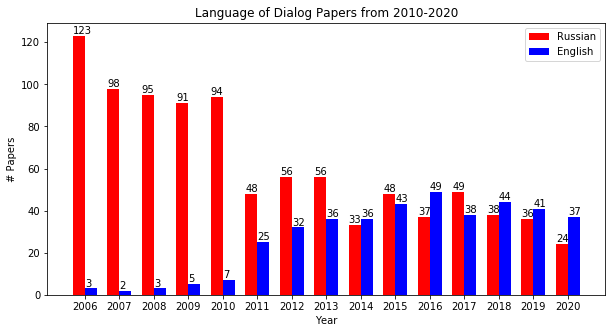

In [2]:
from helpers import get_file_names
from pathlib import Path

import matplotlib.pyplot as plt


# Extract all articles from 2010-2020
year_range = range(2006, 2021)
en_docs = []
ru_docs = []

for year in year_range:
    en_docs.append(len(get_file_names("../data/raw_txt/" +
                                      str(year) + "/en", ".txt")))
    ru_docs.append(len(get_file_names("../data/raw_txt/" +
                                      str(year) + "/ru", ".txt")))

plt.clf()
plt.figure(figsize=(10,5))
plt.title("Language of Dialog Papers from 2010-2020")
plt.xlabel("Year") 
plt.ylabel("# Papers")

width = 0.35
xlocs = [i for i in year_range]
plt.bar(year_range, ru_docs, width, label="Russian", color='red')
for x, y in enumerate(ru_docs):
    plt.text(xlocs[x] - width/2, y + 1, str(y))

plt.bar([year + width for year in year_range], en_docs, width, label="English",
       color='blue')
for x, y in enumerate(en_docs):
    plt.text(xlocs[x] + width/2, y + 1, str(y))

plt.xticks([year + width/2 for year in year_range], year_range)
plt.legend(loc="best")
plt.savefig('../data/LDA/language_distribution.png')
plt.show()

In [16]:
from helpers import get_text
from pathlib import Path
from preprocessing import ScholarlyPreprocessor


# Peek at the transformation of the last paragraph of the first document in the corpus
# as it progresses through the preprocessing steps
file_name = Path("../data/raw_txt/2010/ru/",
                 "эволюция-лингво-семантических-представлений-в-интеллектуальных-системах-на-основе-расширенных-семантических-сетей-p-205.txt")
text = "\n\n".join(get_text(file_name).split("\n\n")[-6:-3])
text = ScholarlyPreprocessor.preprocess_one(text, file_name, verbose=True)

-------------------------------------------------- 
Raw text, before any preprocessing:


7. Заключение
В данной работе представлен опыт создания
и развития лингво-семантических представлений
в интеллектуальных информационных системах,
разработанных на основе аппарата расширенных
семантических сетей (РСС). Аппарат РСС обеспечивает мощные изобразительные возможности для
описания всех уровней естественного языка, включая уровень глубинно-семантических представлений, и межъязыковых соответствий. Конкретные
лингвистические процессоры, которые были соз-
даны на основе этого подхода, прошли определенный эволюционный путь и позволили выработать
проектные решения для основных задач текущего
этапа — извлечения и обработки содержательных
знаний из текстов на естественных языках и сопоставления языковых структур в текстах на различных языках с учетом базовых трансформаций.
Проблема извлечения и обработки знаний открывает перспективы развития интеллектуальных
направлений компьютерной лингвистики, 

2020-07-18 22:37:31,156 : INFO : collecting all words and their counts
2020-07-18 22:37:31,158 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-18 22:37:31,159 : INFO : collected 230 word types from a corpus of 198 words (unigram + bigrams) and 8 sentences
2020-07-18 22:37:31,160 : INFO : using 230 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-18 22:37:31,161 : INFO : collecting all words and their counts
2020-07-18 22:37:31,162 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-18 22:37:31,165 : INFO : collected 230 word types from a corpus of 198 words (unigram + bigrams) and 8 sentences
2020-07-18 22:37:31,166 : INFO : using 230 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>



After tokenization:


['x', '.', 'заключение', 'в', 'данный', 'работа', 'представлять', 'опыт', 'создание', 'и', 'развитие', 'лингво-семантический', 'представление', 'в', 'интеллектуальный', 'информационный', 'система', ',', 'разрабатывать', 'на', 'основа', 'аппарат', 'расширить', 'семантический', 'сеть', '.', 'аппарат::рсс', 'обеспечивать', 'мощный', 'изобразительный', 'возможность', 'для', 'описание', 'весь', 'уровень', 'естественный', 'язык', ',', 'включая', 'уровень', 'глубинный', '-', 'семантический', 'представление', ',', 'и', 'межъязыковый', 'соответствие', '.', 'конкретный', 'лингвистический', 'процессор', ',', 'который', 'быть', 'давать', 'на', 'основа', 'этот', 'подход', ',', 'проходить', 'определенный', 'эволюционный', 'путь', 'и', 'позволять', 'вырабатывать', 'проектный', 'решение', 'для', 'основной', 'задача', 'текущий', 'этап', '—', 'извлечение', 'и', 'обработка', 'содержательный', 'знание', 'из', 'текст', 'на', 'естественный', 'язык', 'и', 'сопоставление', 'языковой', '

In [4]:
from helpers import get_file_names, get_text
from pathlib import Path
from preprocessing import ScholarlyPreprocessor

import os
import pickle


# Preprocess the entire corpus
year_range = range(2006, 2021)
target = str(Path("../data/preprocessed").resolve())
if not os.path.exists(target):
    os.makedirs(target)

for year in year_range:
    output_file = Path(target, str(year) + ".pickle")
    if not os.path.isfile(output_file):
        print("Preprocessing text from", year, "to", output_file)

        file_names = get_file_names("../data/raw_txt/" + str(year)
                                    + "/ru", ".txt")
        corpus = [get_text(name) for name in file_names]
        corpus = ScholarlyPreprocessor.preprocess(corpus, file_names)

        with open(output_file, "wb") as file:
            pickle.dump(corpus, file, pickle.HIGHEST_PROTOCOL)
        print("Finished preprocessing text from", year, 
              "to", output_file)
    else:
        print(output_file, "already preprocessed")

Preprocessing text from 2006 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2006.pickle


2020-07-19 01:57:50,844 : INFO : collecting all words and their counts
2020-07-19 01:57:50,844 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:57:50,847 : INFO : collected 1497 word types from a corpus of 2211 words (unigram + bigrams) and 167 sentences
2020-07-19 01:57:50,848 : INFO : using 1497 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:57:50,850 : INFO : collecting all words and their counts
2020-07-19 01:57:50,851 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:57:50,864 : INFO : collected 1497 word types from a corpus of 2207 words (unigram + bigrams) and 167 sentences
2020-07-19 01:57:50,865 : INFO : using 1497 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:57:50,902 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\автоматизация-формирования-индикаторных-словарей-и-

2020-07-19 01:58:04,161 : INFO : collected 897 word types from a corpus of 967 words (unigram + bigrams) and 60 sentences
2020-07-19 01:58:04,162 : INFO : using 897 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:58:04,181 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\анализ-параметров-речевого-сигнала-создающих-восприятие-элементарных-звуков-речи-p-220.txt
2020-07-19 01:58:05,106 : INFO : collecting all words and their counts
2020-07-19 01:58:05,107 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:58:05,109 : INFO : collected 867 word types from a corpus of 991 words (unigram + bigrams) and 49 sentences
2020-07-19 01:58:05,109 : INFO : using 867 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:58:05,111 : INFO : collecting all words and their counts
2020-07-19 01:58:05,112 : INFO : PROGRESS: at sentence #0, pro

2020-07-19 01:58:21,124 : INFO : using 1151 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:58:21,125 : INFO : collecting all words and their counts
2020-07-19 01:58:21,126 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:58:21,139 : INFO : collected 1154 word types from a corpus of 1441 words (unigram + bigrams) and 69 sentences
2020-07-19 01:58:21,140 : INFO : using 1154 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:58:21,168 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\гипертекст-контекст-и-подтекст-в-поисково-аналитической-системе-галактика-zoom-p-73.txt
2020-07-19 01:58:23,558 : INFO : collecting all words and their counts
2020-07-19 01:58:23,559 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:58:23,564 : INFO : collected 1966 word types from a corpus of 2318 words (u

2020-07-19 01:58:38,538 : INFO : using 1027 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:58:38,539 : INFO : collecting all words and their counts
2020-07-19 01:58:38,540 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:58:38,549 : INFO : collected 1032 word types from a corpus of 1193 words (unigram + bigrams) and 57 sentences
2020-07-19 01:58:38,550 : INFO : using 1032 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:58:38,572 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\интегрированная-информационная-среда-starling-и-её-использование-в-сфере-корпусной-лингвистики-p-303.txt
2020-07-19 01:58:40,340 : INFO : collecting all words and their counts
2020-07-19 01:58:40,341 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:58:40,345 : INFO : collected 1623 word types from a corpus

2020-07-19 01:58:57,622 : INFO : collecting all words and their counts
2020-07-19 01:58:57,622 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:58:57,636 : INFO : collected 1919 word types from a corpus of 2441 words (unigram + bigrams) and 167 sentences
2020-07-19 01:58:57,636 : INFO : using 1919 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:58:57,689 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\классификационная-среда-для-систематизации-и-поиска-информационных-ресурсов-по-науке-и-технике-p-61.txt
2020-07-19 01:58:58,896 : INFO : collecting all words and their counts
2020-07-19 01:58:58,897 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:58:58,899 : INFO : collected 1024 word types from a corpus of 1122 words (unigram + bigrams) and 54 sentences
2020-07-19 01:58:58,900 : INFO : using 1024 counts as vocab in Phrases<0 vocab, mi

2020-07-19 01:59:14,124 : INFO : collecting all words and their counts
2020-07-19 01:59:14,125 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:59:14,135 : INFO : collected 1552 word types from a corpus of 1663 words (unigram + bigrams) and 119 sentences
2020-07-19 01:59:14,136 : INFO : using 1552 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:59:14,168 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\мелодические-признаки-и-опорные-элементы-при-восприятии-текста-p-583.txt
2020-07-19 01:59:16,124 : INFO : collecting all words and their counts
2020-07-19 01:59:16,125 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:59:16,128 : INFO : collected 1516 word types from a corpus of 2105 words (unigram + bigrams) and 121 sentences
2020-07-19 01:59:16,129 : INFO : using 1516 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max

2020-07-19 01:59:31,943 : INFO : using 1599 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:59:31,973 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\многозначные-синтаксические-фраземы-между-лексикой-и-синтаксисом-p-202.txt
2020-07-19 01:59:33,980 : INFO : collecting all words and their counts
2020-07-19 01:59:33,981 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:59:33,986 : INFO : collected 1522 word types from a corpus of 2033 words (unigram + bigrams) and 112 sentences
2020-07-19 01:59:33,986 : INFO : using 1522 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:59:33,987 : INFO : collecting all words and their counts
2020-07-19 01:59:33,988 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:59:34,004 : INFO : collected 1524 word types from a corpus of 2003 words (unigram + big

2020-07-19 01:59:53,629 : INFO : collecting all words and their counts
2020-07-19 01:59:53,629 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:59:53,632 : INFO : collected 1330 word types from a corpus of 1821 words (unigram + bigrams) and 174 sentences
2020-07-19 01:59:53,633 : INFO : using 1330 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:59:53,634 : INFO : collecting all words and their counts
2020-07-19 01:59:53,635 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 01:59:53,647 : INFO : collected 1330 word types from a corpus of 1737 words (unigram + bigrams) and 174 sentences
2020-07-19 01:59:53,647 : INFO : using 1330 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 01:59:53,679 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\о-грамматике-концептуальных-отношений-p-342.txt
202

2020-07-19 02:00:08,842 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:00:08,853 : INFO : collected 1119 word types from a corpus of 1617 words (unigram + bigrams) and 121 sentences
2020-07-19 02:00:08,854 : INFO : using 1119 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:00:08,879 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\опыт-экспериментальной-реализации-алгоритмов-поверхностно-синтаксического-анализа-p-51.txt
2020-07-19 02:00:11,022 : INFO : collecting all words and their counts
2020-07-19 02:00:11,023 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:00:11,026 : INFO : collected 1790 word types from a corpus of 2241 words (unigram + bigrams) and 123 sentences
2020-07-19 02:00:11,027 : INFO : using 1790 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:00:11,029 : INFO 

2020-07-19 02:00:25,277 : INFO : collecting all words and their counts
2020-07-19 02:00:25,277 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:00:25,284 : INFO : collected 942 word types from a corpus of 1190 words (unigram + bigrams) and 64 sentences
2020-07-19 02:00:25,284 : INFO : using 942 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:00:27,263 : INFO : collecting all words and their counts
2020-07-19 02:00:27,264 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:00:27,267 : INFO : collected 1238 word types from a corpus of 1780 words (unigram + bigrams) and 86 sentences
2020-07-19 02:00:27,268 : INFO : using 1238 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:00:27,269 : INFO : collecting all words and their counts
2020-07-19 02:00:27,270 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 wo

2020-07-19 02:00:42,686 : INFO : using 1813 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:00:42,688 : INFO : collecting all words and their counts
2020-07-19 02:00:42,689 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:00:42,701 : INFO : collected 1813 word types from a corpus of 2078 words (unigram + bigrams) and 129 sentences
2020-07-19 02:00:42,702 : INFO : using 1813 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:00:42,742 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\проблемы-оцифровывания-лексикографического-текста-на-материале-словаря-монье-вилямса.txt
2020-07-19 02:00:44,571 : INFO : collecting all words and their counts
2020-07-19 02:00:44,571 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:00:44,574 : INFO : collected 1548 word types from a corpus of 1770 words 

2020-07-19 02:00:56,655 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:00:56,665 : INFO : collected 1413 word types from a corpus of 1887 words (unigram + bigrams) and 92 sentences
2020-07-19 02:00:56,666 : INFO : using 1413 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:00:56,698 : INFO : Could not find references section for file: ..\data\raw_txt\2006\ru\семантика-и-прагматика-судьбы-p-31.txt
2020-07-19 02:01:00,073 : INFO : collecting all words and their counts
2020-07-19 02:01:00,074 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:01:00,080 : INFO : collected 2315 word types from a corpus of 3513 words (unigram + bigrams) and 155 sentences
2020-07-19 02:01:00,081 : INFO : using 2315 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:01:00,082 : INFO : collecting all words and their counts
2020-07-19 02

2020-07-19 02:01:13,688 : INFO : collected 1216 word types from a corpus of 1697 words (unigram + bigrams) and 126 sentences
2020-07-19 02:01:13,689 : INFO : using 1216 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:01:15,525 : INFO : collecting all words and their counts
2020-07-19 02:01:15,526 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:01:15,529 : INFO : collected 1494 word types from a corpus of 2012 words (unigram + bigrams) and 101 sentences
2020-07-19 02:01:15,529 : INFO : using 1494 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:01:15,530 : INFO : collecting all words and their counts
2020-07-19 02:01:15,531 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:01:15,540 : INFO : collected 1492 word types from a corpus of 1931 words (unigram + bigrams) and 101 sentences
2020-07-19 02:01:15,541 : I

2020-07-19 02:01:28,349 : INFO : collected 1654 word types from a corpus of 2056 words (unigram + bigrams) and 98 sentences
2020-07-19 02:01:28,350 : INFO : using 1654 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:01:28,352 : INFO : collecting all words and their counts
2020-07-19 02:01:28,353 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:01:28,366 : INFO : collected 1656 word types from a corpus of 1989 words (unigram + bigrams) and 98 sentences
2020-07-19 02:01:28,367 : INFO : using 1656 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:01:30,186 : INFO : collecting all words and their counts
2020-07-19 02:01:30,188 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:01:30,192 : INFO : collected 1721 word types from a corpus of 1925 words (unigram + bigrams) and 112 sentences
2020-07-19 02:01:30,193 : INF

Finished preprocessing text from 2006 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2006.pickle
Preprocessing text from 2007 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2007.pickle


2020-07-19 02:01:44,070 : INFO : collecting all words and their counts
2020-07-19 02:01:44,071 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:01:44,078 : INFO : collected 2068 word types from a corpus of 2501 words (unigram + bigrams) and 131 sentences
2020-07-19 02:01:44,079 : INFO : using 2068 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:01:44,080 : INFO : collecting all words and their counts
2020-07-19 02:01:44,081 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:01:44,102 : INFO : collected 2086 word types from a corpus of 2388 words (unigram + bigrams) and 131 sentences
2020-07-19 02:01:44,103 : INFO : using 2086 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:01:46,943 : INFO : collecting all words and their counts
2020-07-19 02:01:46,944 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:02:02,472 : INFO : collected 1292 word types from a corpus of 1557 words (unigram + bigrams) and 102 sentences
2020-07-19 02:02:02,473 : INFO : using 1292 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:02:02,974 : INFO : collecting all words and their counts
2020-07-19 02:02:02,975 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:02:02,976 : INFO : collected 356 word types from a corpus of 395 words (unigram + bigrams) and 24 sentences
2020-07-19 02:02:02,977 : INFO : using 356 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:02:02,978 : INFO : collecting all words and their counts
2020-07-19 02:02:02,978 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:02:02,981 : INFO : collected 355 word types from a corpus of 382 words (unigram + bigrams) and 24 sentences
2020-07-19 02:02:02,982 : INFO : u

2020-07-19 02:02:21,581 : INFO : collecting all words and their counts
2020-07-19 02:02:21,582 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:02:21,604 : INFO : collected 3058 word types from a corpus of 3643 words (unigram + bigrams) and 161 sentences
2020-07-19 02:02:21,604 : INFO : using 3058 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:02:23,398 : INFO : collecting all words and their counts
2020-07-19 02:02:23,398 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:02:23,403 : INFO : collected 1580 word types from a corpus of 1869 words (unigram + bigrams) and 91 sentences
2020-07-19 02:02:23,404 : INFO : using 1580 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:02:23,405 : INFO : collecting all words and their counts
2020-07-19 02:02:23,406 : INFO : PROGRESS: at sentence #0, processed 0 words and 0

2020-07-19 02:02:40,318 : INFO : collecting all words and their counts
2020-07-19 02:02:40,318 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:02:40,322 : INFO : collected 1844 word types from a corpus of 2140 words (unigram + bigrams) and 109 sentences
2020-07-19 02:02:40,322 : INFO : using 1844 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:02:40,323 : INFO : collecting all words and their counts
2020-07-19 02:02:40,324 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:02:40,336 : INFO : collected 1846 word types from a corpus of 2105 words (unigram + bigrams) and 109 sentences
2020-07-19 02:02:40,337 : INFO : using 1846 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:02:41,734 : INFO : collecting all words and their counts
2020-07-19 02:02:41,734 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:03:00,555 : INFO : collected 2358 word types from a corpus of 3262 words (unigram + bigrams) and 149 sentences
2020-07-19 02:03:00,556 : INFO : using 2358 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:03:04,954 : INFO : collecting all words and their counts
2020-07-19 02:03:04,955 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:03:04,960 : INFO : collected 2073 word types from a corpus of 3398 words (unigram + bigrams) and 222 sentences
2020-07-19 02:03:04,961 : INFO : using 2073 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:03:04,962 : INFO : collecting all words and their counts
2020-07-19 02:03:04,964 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:03:04,984 : INFO : collected 2068 word types from a corpus of 3319 words (unigram + bigrams) and 222 sentences
2020-07-19 02:03:04,984 : I

2020-07-19 02:03:41,164 : INFO : collecting all words and their counts
2020-07-19 02:03:41,165 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:03:41,171 : INFO : collected 2823 word types from a corpus of 3749 words (unigram + bigrams) and 244 sentences
2020-07-19 02:03:41,171 : INFO : using 2823 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:03:41,173 : INFO : collecting all words and their counts
2020-07-19 02:03:41,173 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:03:41,198 : INFO : collected 2830 word types from a corpus of 3628 words (unigram + bigrams) and 244 sentences
2020-07-19 02:03:41,198 : INFO : using 2830 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:03:43,502 : INFO : collecting all words and their counts
2020-07-19 02:03:43,503 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:03:59,809 : INFO : collected 1614 word types from a corpus of 2086 words (unigram + bigrams) and 111 sentences
2020-07-19 02:03:59,810 : INFO : using 1614 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:04:02,094 : INFO : collecting all words and their counts
2020-07-19 02:04:02,095 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:04:02,099 : INFO : collected 1794 word types from a corpus of 2275 words (unigram + bigrams) and 91 sentences
2020-07-19 02:04:02,100 : INFO : using 1794 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:04:02,101 : INFO : collecting all words and their counts
2020-07-19 02:04:02,101 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:04:02,113 : INFO : collected 1796 word types from a corpus of 2198 words (unigram + bigrams) and 91 sentences
2020-07-19 02:04:02,114 : INF

2020-07-19 02:04:19,745 : INFO : collected 1630 word types from a corpus of 2367 words (unigram + bigrams) and 143 sentences
2020-07-19 02:04:19,746 : INFO : using 1630 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:04:19,747 : INFO : collecting all words and their counts
2020-07-19 02:04:19,748 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:04:19,760 : INFO : collected 1631 word types from a corpus of 2302 words (unigram + bigrams) and 143 sentences
2020-07-19 02:04:19,761 : INFO : using 1631 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:04:22,067 : INFO : collecting all words and their counts
2020-07-19 02:04:22,067 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:04:22,072 : INFO : collected 1695 word types from a corpus of 2490 words (unigram + bigrams) and 161 sentences
2020-07-19 02:04:22,073 : I

2020-07-19 02:04:36,955 : INFO : collecting all words and their counts
2020-07-19 02:04:36,955 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:04:36,968 : INFO : collected 1669 word types from a corpus of 1965 words (unigram + bigrams) and 101 sentences
2020-07-19 02:04:36,968 : INFO : using 1669 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:04:40,013 : INFO : collecting all words and their counts
2020-07-19 02:04:40,014 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:04:40,020 : INFO : collected 2302 word types from a corpus of 3183 words (unigram + bigrams) and 210 sentences
2020-07-19 02:04:40,020 : INFO : using 2302 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:04:40,022 : INFO : collecting all words and their counts
2020-07-19 02:04:40,023 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:05:00,044 : INFO : using 1876 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:03,209 : INFO : collecting all words and their counts
2020-07-19 02:05:03,210 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:05:03,215 : INFO : collected 2409 word types from a corpus of 3347 words (unigram + bigrams) and 169 sentences
2020-07-19 02:05:03,215 : INFO : using 2409 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:03,217 : INFO : collecting all words and their counts
2020-07-19 02:05:03,217 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:05:03,240 : INFO : collected 2414 word types from a corpus of 3243 words (unigram + bigrams) and 169 sentences
2020-07-19 02:05:03,241 : INFO : using 2414 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:0

2020-07-19 02:05:21,938 : INFO : using 1823 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:21,940 : INFO : collecting all words and their counts
2020-07-19 02:05:21,941 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:05:21,955 : INFO : collected 1829 word types from a corpus of 2027 words (unigram + bigrams) and 112 sentences
2020-07-19 02:05:21,956 : INFO : using 1829 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:21,995 : INFO : Could not find references section for file: ..\data\raw_txt\2007\ru\язык-корпоративных-сайтов-игра-пародия-провокация-p-109.txt
2020-07-19 02:05:24,442 : INFO : collecting all words and their counts
2020-07-19 02:05:24,442 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:05:24,447 : INFO : collected 2142 word types from a corpus of 2685 words (unigram + bigrams) and 179 s

Finished preprocessing text from 2007 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2007.pickle
Preprocessing text from 2008 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2008.pickle


2020-07-19 02:05:28,842 : INFO : collecting all words and their counts
2020-07-19 02:05:28,842 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:05:28,846 : INFO : collected 1654 word types from a corpus of 1909 words (unigram + bigrams) and 75 sentences
2020-07-19 02:05:28,847 : INFO : using 1654 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:28,848 : INFO : collecting all words and their counts
2020-07-19 02:05:28,850 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:05:28,861 : INFO : collected 1658 word types from a corpus of 1857 words (unigram + bigrams) and 75 sentences
2020-07-19 02:05:28,862 : INFO : using 1658 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:30,535 : INFO : collecting all words and their counts
2020-07-19 02:05:30,536 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-19 02:05:45,189 : INFO : using 800 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:45,190 : INFO : collecting all words and their counts
2020-07-19 02:05:45,191 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:05:45,198 : INFO : collected 798 word types from a corpus of 818 words (unigram + bigrams) and 48 sentences
2020-07-19 02:05:45,198 : INFO : using 798 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:46,804 : INFO : collecting all words and their counts
2020-07-19 02:05:46,805 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:05:46,808 : INFO : collected 1434 word types from a corpus of 1566 words (unigram + bigrams) and 72 sentences
2020-07-19 02:05:46,808 : INFO : using 1434 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:05:46,810 

2020-07-19 02:06:04,880 : INFO : using 1471 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:06:05,917 : INFO : collecting all words and their counts
2020-07-19 02:06:05,918 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:06:05,920 : INFO : collected 885 word types from a corpus of 1095 words (unigram + bigrams) and 90 sentences
2020-07-19 02:06:05,921 : INFO : using 885 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:06:05,923 : INFO : collecting all words and their counts
2020-07-19 02:06:05,924 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:06:05,931 : INFO : collected 883 word types from a corpus of 1069 words (unigram + bigrams) and 90 sentences
2020-07-19 02:06:05,931 : INFO : using 883 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:06:05,951 

2020-07-19 02:06:21,778 : INFO : using 1747 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:06:23,776 : INFO : collecting all words and their counts
2020-07-19 02:06:23,776 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:06:23,780 : INFO : collected 1413 word types from a corpus of 1817 words (unigram + bigrams) and 148 sentences
2020-07-19 02:06:23,781 : INFO : using 1413 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:06:23,783 : INFO : collecting all words and their counts
2020-07-19 02:06:23,783 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:06:23,795 : INFO : collected 1417 word types from a corpus of 1744 words (unigram + bigrams) and 148 sentences
2020-07-19 02:06:23,796 : INFO : using 1417 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:06:2

2020-07-19 02:06:43,615 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:06:43,636 : INFO : collected 2827 word types from a corpus of 3581 words (unigram + bigrams) and 195 sentences
2020-07-19 02:06:43,637 : INFO : using 2827 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:06:46,104 : INFO : collecting all words and their counts
2020-07-19 02:06:46,105 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:06:46,109 : INFO : collected 1928 word types from a corpus of 2562 words (unigram + bigrams) and 114 sentences
2020-07-19 02:06:46,110 : INFO : using 1928 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:06:46,111 : INFO : collecting all words and their counts
2020-07-19 02:06:46,112 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:06:46,126 : INFO : collected 1944 word types

2020-07-19 02:07:04,218 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:07:04,225 : INFO : collected 2968 word types from a corpus of 3768 words (unigram + bigrams) and 182 sentences
2020-07-19 02:07:04,225 : INFO : using 2968 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:07:04,226 : INFO : collecting all words and their counts
2020-07-19 02:07:04,228 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:07:04,249 : INFO : collected 2969 word types from a corpus of 3742 words (unigram + bigrams) and 182 sentences
2020-07-19 02:07:04,250 : INFO : using 2969 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:07:06,463 : INFO : collecting all words and their counts
2020-07-19 02:07:06,463 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:07:06,467 : INFO : collected 1693 word types

2020-07-19 02:07:23,625 : INFO : collecting all words and their counts
2020-07-19 02:07:23,626 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:07:23,638 : INFO : collected 1266 word types from a corpus of 1973 words (unigram + bigrams) and 158 sentences
2020-07-19 02:07:23,639 : INFO : using 1266 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:07:25,356 : INFO : collecting all words and their counts
2020-07-19 02:07:25,357 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:07:25,360 : INFO : collected 1455 word types from a corpus of 1719 words (unigram + bigrams) and 112 sentences
2020-07-19 02:07:25,361 : INFO : using 1455 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:07:25,362 : INFO : collecting all words and their counts
2020-07-19 02:07:25,363 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:07:42,811 : INFO : collecting all words and their counts
2020-07-19 02:07:42,812 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:07:42,828 : INFO : collected 2115 word types from a corpus of 2476 words (unigram + bigrams) and 132 sentences
2020-07-19 02:07:42,828 : INFO : using 2115 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:07:45,953 : INFO : collecting all words and their counts
2020-07-19 02:07:45,954 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:07:45,959 : INFO : collected 2053 word types from a corpus of 2890 words (unigram + bigrams) and 120 sentences
2020-07-19 02:07:45,959 : INFO : using 2053 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:07:45,961 : INFO : collecting all words and their counts
2020-07-19 02:07:45,961 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:08:09,001 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:08:09,006 : INFO : collected 983 word types from a corpus of 1157 words (unigram + bigrams) and 80 sentences
2020-07-19 02:08:09,007 : INFO : using 983 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:08:09,009 : INFO : collecting all words and their counts
2020-07-19 02:08:09,010 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:08:09,023 : INFO : collected 986 word types from a corpus of 1137 words (unigram + bigrams) and 80 sentences
2020-07-19 02:08:09,025 : INFO : using 986 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:08:11,800 : INFO : collecting all words and their counts
2020-07-19 02:08:11,801 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:08:11,805 : INFO : collected 1518 word types from 

2020-07-19 02:08:36,642 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:08:36,668 : INFO : collected 1694 word types from a corpus of 1799 words (unigram + bigrams) and 110 sentences
2020-07-19 02:08:36,669 : INFO : using 1694 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:08:39,430 : INFO : collecting all words and their counts
2020-07-19 02:08:39,431 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:08:39,437 : INFO : collected 1425 word types from a corpus of 2007 words (unigram + bigrams) and 90 sentences
2020-07-19 02:08:39,438 : INFO : using 1425 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:08:39,440 : INFO : collecting all words and their counts
2020-07-19 02:08:39,442 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:08:39,459 : INFO : collected 1425 word types 

2020-07-19 02:09:05,771 : INFO : using 913 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:09:05,773 : INFO : collecting all words and their counts
2020-07-19 02:09:05,774 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:09:05,791 : INFO : collected 909 word types from a corpus of 1492 words (unigram + bigrams) and 121 sentences
2020-07-19 02:09:05,793 : INFO : using 909 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>


Finished preprocessing text from 2008 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2008.pickle
Preprocessing text from 2009 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2009.pickle


2020-07-19 02:09:09,981 : INFO : collecting all words and their counts
2020-07-19 02:09:09,981 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:09:09,990 : INFO : collected 1898 word types from a corpus of 2230 words (unigram + bigrams) and 96 sentences
2020-07-19 02:09:09,991 : INFO : using 1898 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:09:09,993 : INFO : collecting all words and their counts
2020-07-19 02:09:09,994 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:09:10,014 : INFO : collected 1903 word types from a corpus of 2123 words (unigram + bigrams) and 96 sentences
2020-07-19 02:09:10,015 : INFO : using 1903 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:09:13,383 : INFO : collecting all words and their counts
2020-07-19 02:09:13,384 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-19 02:09:36,864 : INFO : collected 1231 word types from a corpus of 1633 words (unigram + bigrams) and 116 sentences
2020-07-19 02:09:36,865 : INFO : using 1231 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:09:39,783 : INFO : collecting all words and their counts
2020-07-19 02:09:39,784 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:09:39,789 : INFO : collected 1743 word types from a corpus of 1978 words (unigram + bigrams) and 92 sentences
2020-07-19 02:09:39,791 : INFO : using 1743 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:09:39,794 : INFO : collecting all words and their counts
2020-07-19 02:09:39,795 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:09:39,816 : INFO : collected 1745 word types from a corpus of 1943 words (unigram + bigrams) and 92 sentences
2020-07-19 02:09:39,817 : INF

2020-07-19 02:10:19,994 : INFO : collected 1093 word types from a corpus of 1348 words (unigram + bigrams) and 88 sentences
2020-07-19 02:10:19,994 : INFO : using 1093 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:10:19,997 : INFO : collecting all words and their counts
2020-07-19 02:10:19,998 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:10:20,014 : INFO : collected 1099 word types from a corpus of 1300 words (unigram + bigrams) and 88 sentences
2020-07-19 02:10:20,015 : INFO : using 1099 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:10:22,722 : INFO : collecting all words and their counts
2020-07-19 02:10:22,723 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:10:22,729 : INFO : collected 1430 word types from a corpus of 1899 words (unigram + bigrams) and 170 sentences
2020-07-19 02:10:22,729 : INF

2020-07-19 02:10:51,301 : INFO : collected 1139 word types from a corpus of 1537 words (unigram + bigrams) and 131 sentences
2020-07-19 02:10:51,303 : INFO : using 1139 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:10:54,006 : INFO : collecting all words and their counts
2020-07-19 02:10:54,007 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:10:54,012 : INFO : collected 1496 word types from a corpus of 1776 words (unigram + bigrams) and 93 sentences
2020-07-19 02:10:54,013 : INFO : using 1496 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:10:54,014 : INFO : collecting all words and their counts
2020-07-19 02:10:54,015 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:10:54,036 : INFO : collected 1501 word types from a corpus of 1734 words (unigram + bigrams) and 93 sentences
2020-07-19 02:10:54,037 : INF

2020-07-19 02:11:19,377 : INFO : collecting all words and their counts
2020-07-19 02:11:19,378 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:11:19,388 : INFO : collected 728 word types from a corpus of 707 words (unigram + bigrams) and 61 sentences
2020-07-19 02:11:19,389 : INFO : using 728 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:11:21,744 : INFO : collecting all words and their counts
2020-07-19 02:11:21,745 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:11:21,751 : INFO : collected 1195 word types from a corpus of 1572 words (unigram + bigrams) and 59 sentences
2020-07-19 02:11:21,753 : INFO : using 1195 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:11:21,755 : INFO : collecting all words and their counts
2020-07-19 02:11:21,756 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 wor

2020-07-19 02:11:51,488 : INFO : collecting all words and their counts
2020-07-19 02:11:51,489 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:11:51,494 : INFO : collected 1313 word types from a corpus of 1722 words (unigram + bigrams) and 98 sentences
2020-07-19 02:11:51,495 : INFO : using 1313 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:11:51,496 : INFO : collecting all words and their counts
2020-07-19 02:11:51,497 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:11:51,514 : INFO : collected 1316 word types from a corpus of 1667 words (unigram + bigrams) and 98 sentences
2020-07-19 02:11:51,515 : INFO : using 1316 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:11:52,957 : INFO : collecting all words and their counts
2020-07-19 02:11:52,959 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-19 02:12:16,783 : INFO : collected 1202 word types from a corpus of 1595 words (unigram + bigrams) and 108 sentences
2020-07-19 02:12:16,783 : INFO : using 1202 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:12:19,656 : INFO : collecting all words and their counts
2020-07-19 02:12:19,657 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:12:19,663 : INFO : collected 1309 word types from a corpus of 2139 words (unigram + bigrams) and 177 sentences
2020-07-19 02:12:19,664 : INFO : using 1309 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:12:19,666 : INFO : collecting all words and their counts
2020-07-19 02:12:19,667 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:12:19,684 : INFO : collected 1311 word types from a corpus of 2114 words (unigram + bigrams) and 177 sentences
2020-07-19 02:12:19,685 : I

2020-07-19 02:12:47,988 : INFO : collected 1441 word types from a corpus of 2178 words (unigram + bigrams) and 124 sentences
2020-07-19 02:12:47,989 : INFO : using 1441 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:12:47,991 : INFO : collecting all words and their counts
2020-07-19 02:12:47,991 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:12:48,012 : INFO : collected 1440 word types from a corpus of 2169 words (unigram + bigrams) and 124 sentences
2020-07-19 02:12:48,014 : INFO : using 1440 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:12:51,968 : INFO : collecting all words and their counts
2020-07-19 02:12:51,969 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:12:51,975 : INFO : collected 1666 word types from a corpus of 2771 words (unigram + bigrams) and 99 sentences
2020-07-19 02:12:51,976 : IN

2020-07-19 02:13:22,168 : INFO : collecting all words and their counts
2020-07-19 02:13:22,169 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:13:22,176 : INFO : collected 1965 word types from a corpus of 2307 words (unigram + bigrams) and 110 sentences
2020-07-19 02:13:22,177 : INFO : using 1965 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:13:22,179 : INFO : collecting all words and their counts
2020-07-19 02:13:22,180 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:13:22,197 : INFO : collected 1965 word types from a corpus of 2295 words (unigram + bigrams) and 110 sentences
2020-07-19 02:13:22,198 : INFO : using 1965 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:13:24,589 : INFO : collecting all words and their counts
2020-07-19 02:13:24,590 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:13:47,439 : INFO : collected 1586 word types from a corpus of 2143 words (unigram + bigrams) and 135 sentences
2020-07-19 02:13:47,440 : INFO : using 1586 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:13:51,195 : INFO : collecting all words and their counts
2020-07-19 02:13:51,195 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:13:51,201 : INFO : collected 2318 word types from a corpus of 3364 words (unigram + bigrams) and 195 sentences
2020-07-19 02:13:51,201 : INFO : using 2318 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:13:51,204 : INFO : collecting all words and their counts
2020-07-19 02:13:51,206 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:13:51,229 : INFO : collected 2323 word types from a corpus of 3301 words (unigram + bigrams) and 195 sentences
2020-07-19 02:13:51,230 : I

Finished preprocessing text from 2009 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2009.pickle
Preprocessing text from 2010 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2010.pickle


2020-07-19 02:14:01,246 : INFO : collecting all words and their counts
2020-07-19 02:14:01,247 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:14:01,252 : INFO : collected 1662 word types from a corpus of 2448 words (unigram + bigrams) and 124 sentences
2020-07-19 02:14:01,252 : INFO : using 1662 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:14:01,253 : INFO : collecting all words and their counts
2020-07-19 02:14:01,254 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:14:01,269 : INFO : collected 1668 word types from a corpus of 2360 words (unigram + bigrams) and 124 sentences
2020-07-19 02:14:01,270 : INFO : using 1668 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:14:04,823 : INFO : collecting all words and their counts
2020-07-19 02:14:04,824 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:14:23,484 : INFO : collected 1552 word types from a corpus of 1905 words (unigram + bigrams) and 101 sentences
2020-07-19 02:14:23,485 : INFO : using 1552 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:14:26,063 : INFO : collecting all words and their counts
2020-07-19 02:14:26,064 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:14:26,070 : INFO : collected 1484 word types from a corpus of 2012 words (unigram + bigrams) and 142 sentences
2020-07-19 02:14:26,071 : INFO : using 1484 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:14:26,073 : INFO : collecting all words and their counts
2020-07-19 02:14:26,074 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:14:26,090 : INFO : collected 1487 word types from a corpus of 1969 words (unigram + bigrams) and 142 sentences
2020-07-19 02:14:26,091 : I

2020-07-19 02:14:50,807 : INFO : collected 1565 word types from a corpus of 2075 words (unigram + bigrams) and 117 sentences
2020-07-19 02:14:50,808 : INFO : using 1565 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:14:50,809 : INFO : collecting all words and their counts
2020-07-19 02:14:50,810 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:14:50,824 : INFO : collected 1565 word types from a corpus of 1978 words (unigram + bigrams) and 117 sentences
2020-07-19 02:14:50,825 : INFO : using 1565 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:14:53,179 : INFO : collecting all words and their counts
2020-07-19 02:14:53,180 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:14:53,184 : INFO : collected 1188 word types from a corpus of 1432 words (unigram + bigrams) and 92 sentences
2020-07-19 02:14:53,185 : IN

2020-07-19 02:15:17,594 : INFO : collecting all words and their counts
2020-07-19 02:15:17,595 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:15:17,600 : INFO : collected 1759 word types from a corpus of 2664 words (unigram + bigrams) and 178 sentences
2020-07-19 02:15:17,601 : INFO : using 1759 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:15:17,602 : INFO : collecting all words and their counts
2020-07-19 02:15:17,603 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:15:17,621 : INFO : collected 1764 word types from a corpus of 2594 words (unigram + bigrams) and 178 sentences
2020-07-19 02:15:17,622 : INFO : using 1764 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:15:22,265 : INFO : collecting all words and their counts
2020-07-19 02:15:22,265 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:15:43,897 : INFO : collected 1207 word types from a corpus of 1572 words (unigram + bigrams) and 137 sentences
2020-07-19 02:15:43,898 : INFO : using 1207 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:15:46,089 : INFO : collecting all words and their counts
2020-07-19 02:15:46,089 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:15:46,092 : INFO : collected 1536 word types from a corpus of 1799 words (unigram + bigrams) and 97 sentences
2020-07-19 02:15:46,094 : INFO : using 1536 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:15:46,094 : INFO : collecting all words and their counts
2020-07-19 02:15:46,095 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:15:46,109 : INFO : collected 1535 word types from a corpus of 1788 words (unigram + bigrams) and 97 sentences
2020-07-19 02:15:46,109 : INF

2020-07-19 02:16:07,301 : INFO : collected 1419 word types from a corpus of 1604 words (unigram + bigrams) and 89 sentences
2020-07-19 02:16:07,302 : INFO : using 1419 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:16:07,304 : INFO : collecting all words and their counts
2020-07-19 02:16:07,305 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:16:07,322 : INFO : collected 1422 word types from a corpus of 1571 words (unigram + bigrams) and 89 sentences
2020-07-19 02:16:07,323 : INFO : using 1422 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:16:09,146 : INFO : collecting all words and their counts
2020-07-19 02:16:09,147 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:16:09,150 : INFO : collected 1275 word types from a corpus of 1601 words (unigram + bigrams) and 126 sentences
2020-07-19 02:16:09,151 : INF

2020-07-19 02:16:38,077 : INFO : collecting all words and their counts
2020-07-19 02:16:38,078 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:16:38,085 : INFO : collected 2407 word types from a corpus of 3449 words (unigram + bigrams) and 289 sentences
2020-07-19 02:16:38,085 : INFO : using 2407 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:16:38,087 : INFO : collecting all words and their counts
2020-07-19 02:16:38,087 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:16:38,107 : INFO : collected 2405 word types from a corpus of 3396 words (unigram + bigrams) and 289 sentences
2020-07-19 02:16:38,108 : INFO : using 2405 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:16:39,538 : INFO : collecting all words and their counts
2020-07-19 02:16:39,538 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:16:59,869 : INFO : collected 1620 word types from a corpus of 2026 words (unigram + bigrams) and 136 sentences
2020-07-19 02:16:59,869 : INFO : using 1620 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:17:02,003 : INFO : collecting all words and their counts
2020-07-19 02:17:02,004 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:17:02,007 : INFO : collected 1420 word types from a corpus of 1759 words (unigram + bigrams) and 140 sentences
2020-07-19 02:17:02,009 : INFO : using 1420 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:17:02,011 : INFO : collecting all words and their counts
2020-07-19 02:17:02,012 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:17:02,022 : INFO : collected 1420 word types from a corpus of 1729 words (unigram + bigrams) and 140 sentences
2020-07-19 02:17:02,023 : I

2020-07-19 02:17:28,940 : INFO : collecting all words and their counts
2020-07-19 02:17:28,941 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:17:28,944 : INFO : collected 1283 word types from a corpus of 1507 words (unigram + bigrams) and 78 sentences
2020-07-19 02:17:28,945 : INFO : using 1283 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:17:28,946 : INFO : collecting all words and their counts
2020-07-19 02:17:28,946 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:17:28,956 : INFO : collected 1281 word types from a corpus of 1451 words (unigram + bigrams) and 78 sentences
2020-07-19 02:17:28,957 : INFO : using 1281 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:17:30,735 : INFO : collecting all words and their counts
2020-07-19 02:17:30,736 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 

2020-07-19 02:17:52,347 : INFO : collected 1624 word types from a corpus of 2067 words (unigram + bigrams) and 147 sentences
2020-07-19 02:17:52,348 : INFO : using 1624 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:17:55,486 : INFO : collecting all words and their counts
2020-07-19 02:17:55,487 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:17:55,491 : INFO : collected 1644 word types from a corpus of 2508 words (unigram + bigrams) and 166 sentences
2020-07-19 02:17:55,493 : INFO : using 1644 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:17:55,494 : INFO : collecting all words and their counts
2020-07-19 02:17:55,495 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:17:55,512 : INFO : collected 1647 word types from a corpus of 2463 words (unigram + bigrams) and 166 sentences
2020-07-19 02:17:55,512 : I

Finished preprocessing text from 2010 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2010.pickle
Preprocessing text from 2011 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2011.pickle


2020-07-19 02:18:13,948 : INFO : collecting all words and their counts
2020-07-19 02:18:13,949 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:18:13,951 : INFO : collected 368 word types from a corpus of 578 words (unigram + bigrams) and 112 sentences
2020-07-19 02:18:13,952 : INFO : using 368 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:18:13,953 : INFO : collecting all words and their counts
2020-07-19 02:18:13,954 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:18:13,958 : INFO : collected 367 word types from a corpus of 570 words (unigram + bigrams) and 112 sentences
2020-07-19 02:18:13,959 : INFO : using 367 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:18:13,970 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\how-different-languages-categorize-everyday-items-p-258.t

2020-07-19 02:18:38,564 : INFO : collecting all words and their counts
2020-07-19 02:18:38,565 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:18:38,572 : INFO : collected 2043 word types from a corpus of 2346 words (unigram + bigrams) and 160 sentences
2020-07-19 02:18:38,572 : INFO : using 2043 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:18:38,574 : INFO : collecting all words and their counts
2020-07-19 02:18:38,574 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:18:38,590 : INFO : collected 2050 word types from a corpus of 2306 words (unigram + bigrams) and 160 sentences
2020-07-19 02:18:38,591 : INFO : using 2050 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:18:38,645 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\высокоточный-метод-распознавания-концов-предложений

2020-07-19 02:19:07,415 : INFO : collecting all words and their counts
2020-07-19 02:19:07,416 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:19:07,422 : INFO : collected 1811 word types from a corpus of 2953 words (unigram + bigrams) and 195 sentences
2020-07-19 02:19:07,422 : INFO : using 1811 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:19:07,424 : INFO : collecting all words and their counts
2020-07-19 02:19:07,425 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:19:07,446 : INFO : collected 1812 word types from a corpus of 2900 words (unigram + bigrams) and 195 sentences
2020-07-19 02:19:07,446 : INFO : using 1812 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:19:07,499 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\классификация-эмоционального-состояния-диктора-по-г

2020-07-19 02:19:41,759 : INFO : collecting all words and their counts
2020-07-19 02:19:41,760 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:19:41,772 : INFO : collected 3237 word types from a corpus of 4551 words (unigram + bigrams) and 234 sentences
2020-07-19 02:19:41,773 : INFO : using 3237 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:19:41,774 : INFO : collecting all words and their counts
2020-07-19 02:19:41,776 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:19:41,805 : INFO : collected 3235 word types from a corpus of 4546 words (unigram + bigrams) and 234 sentences
2020-07-19 02:19:41,806 : INFO : using 3235 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:19:41,903 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\невербальный-диалог-в-истории-кинесики-p-349.txt
20

2020-07-19 02:20:11,712 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:20:11,715 : INFO : collected 1097 word types from a corpus of 1266 words (unigram + bigrams) and 82 sentences
2020-07-19 02:20:11,716 : INFO : using 1097 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:20:11,718 : INFO : collecting all words and their counts
2020-07-19 02:20:11,718 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:20:11,727 : INFO : collected 1104 word types from a corpus of 1237 words (unigram + bigrams) and 82 sentences
2020-07-19 02:20:11,727 : INFO : using 1104 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:20:11,758 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\особенности-подготовки-терминов-для-русско-английского-тезауруса-по-компьютерной-лингвистике-p-644.txt
2020-07-19 02:20:15,7

2020-07-19 02:20:38,143 : INFO : collecting all words and their counts
2020-07-19 02:20:38,144 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:20:38,149 : INFO : collected 1765 word types from a corpus of 2314 words (unigram + bigrams) and 150 sentences
2020-07-19 02:20:38,150 : INFO : using 1765 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:20:38,151 : INFO : collecting all words and their counts
2020-07-19 02:20:38,153 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:20:38,171 : INFO : collected 1759 word types from a corpus of 2237 words (unigram + bigrams) and 150 sentences
2020-07-19 02:20:38,172 : INFO : using 1759 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:20:38,218 : INFO : Could not find references section for file: ..\data\raw_txt\2011\ru\синтаксический-анализ-текста-с-орфографическими-оши

Finished preprocessing text from 2011 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2011.pickle
Preprocessing text from 2012 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2012.pickle


2020-07-19 02:21:02,979 : INFO : collecting all words and their counts
2020-07-19 02:21:02,979 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:21:02,981 : INFO : collected 465 word types from a corpus of 413 words (unigram + bigrams) and 19 sentences
2020-07-19 02:21:02,982 : INFO : using 465 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:21:02,984 : INFO : collecting all words and their counts
2020-07-19 02:21:02,985 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:21:02,989 : INFO : collected 465 word types from a corpus of 413 words (unigram + bigrams) and 19 sentences
2020-07-19 02:21:02,990 : INFO : using 465 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:21:08,487 : INFO : collecting all words and their counts
2020-07-19 02:21:08,488 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word t

2020-07-19 02:21:34,097 : INFO : using 1495 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:21:34,098 : INFO : collecting all words and their counts
2020-07-19 02:21:34,099 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:21:34,114 : INFO : collected 1500 word types from a corpus of 1886 words (unigram + bigrams) and 102 sentences
2020-07-19 02:21:34,115 : INFO : using 1500 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:21:34,157 : INFO : Could not find references section for file: ..\data\raw_txt\2012\ru\выбор-оптимального-набора-информативных-признаков-для-классификации-эмоционального-состояния-диктора-по-голосу-v-1-122.txt
2020-07-19 02:21:36,237 : INFO : collecting all words and their counts
2020-07-19 02:21:36,238 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:21:36,243 : INFO : collected 1200 word 

2020-07-19 02:21:59,631 : INFO : collected 1428 word types from a corpus of 1896 words (unigram + bigrams) and 122 sentences
2020-07-19 02:21:59,632 : INFO : using 1428 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:22:02,983 : INFO : collecting all words and their counts
2020-07-19 02:22:02,984 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:22:02,990 : INFO : collected 2019 word types from a corpus of 3031 words (unigram + bigrams) and 145 sentences
2020-07-19 02:22:02,991 : INFO : using 2019 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:22:02,993 : INFO : collecting all words and their counts
2020-07-19 02:22:02,996 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:22:03,015 : INFO : collected 2021 word types from a corpus of 2937 words (unigram + bigrams) and 145 sentences
2020-07-19 02:22:03,015 : I

2020-07-19 02:22:29,772 : INFO : using 2240 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:22:29,773 : INFO : collecting all words and their counts
2020-07-19 02:22:29,774 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:22:29,791 : INFO : collected 2240 word types from a corpus of 2592 words (unigram + bigrams) and 176 sentences
2020-07-19 02:22:29,792 : INFO : using 2240 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:22:29,842 : INFO : Could not find references section for file: ..\data\raw_txt\2012\ru\описание-гэппинга-в-системе-автоматического-перевода-v-161.txt
2020-07-19 02:22:32,402 : INFO : collecting all words and their counts
2020-07-19 02:22:32,403 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:22:32,407 : INFO : collected 1153 word types from a corpus of 1880 words (unigram + bigrams) and 14

2020-07-19 02:22:58,992 : INFO : collected 2267 word types from a corpus of 2762 words (unigram + bigrams) and 148 sentences
2020-07-19 02:22:58,993 : INFO : using 2267 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:22:58,994 : INFO : collecting all words and their counts
2020-07-19 02:22:58,995 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:22:59,016 : INFO : collected 2277 word types from a corpus of 2671 words (unigram + bigrams) and 148 sentences
2020-07-19 02:22:59,016 : INFO : using 2277 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:23:02,085 : INFO : collecting all words and their counts
2020-07-19 02:23:02,086 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:23:02,093 : INFO : collected 1647 word types from a corpus of 2467 words (unigram + bigrams) and 131 sentences
2020-07-19 02:23:02,094 : I

2020-07-19 02:23:24,270 : INFO : collected 1385 word types from a corpus of 1483 words (unigram + bigrams) and 94 sentences
2020-07-19 02:23:24,271 : INFO : using 1385 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:23:26,623 : INFO : collecting all words and their counts
2020-07-19 02:23:26,624 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:23:26,627 : INFO : collected 1564 word types from a corpus of 1778 words (unigram + bigrams) and 95 sentences
2020-07-19 02:23:26,628 : INFO : using 1564 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:23:26,630 : INFO : collecting all words and their counts
2020-07-19 02:23:26,631 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:23:26,644 : INFO : collected 1568 word types from a corpus of 1750 words (unigram + bigrams) and 95 sentences
2020-07-19 02:23:26,644 : INFO

2020-07-19 02:23:54,717 : INFO : collected 2105 word types from a corpus of 2509 words (unigram + bigrams) and 163 sentences
2020-07-19 02:23:54,718 : INFO : using 2105 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:23:54,768 : INFO : Could not find references section for file: ..\data\raw_txt\2012\ru\шолохов-или-все-таки-крюков-неформальные-процедуры-при-установлении-авторства-тихого-дона-v-1-431.txt
2020-07-19 02:24:00,285 : INFO : collecting all words and their counts
2020-07-19 02:24:00,285 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:24:00,296 : INFO : collected 3426 word types from a corpus of 4373 words (unigram + bigrams) and 238 sentences
2020-07-19 02:24:00,296 : INFO : using 3426 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:24:00,299 : INFO : collecting all words and their counts
2020-07-19 02:24:00,300 : INFO : PROGRESS: 

Finished preprocessing text from 2012 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2012.pickle
Preprocessing text from 2013 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2013.pickle


2020-07-19 02:24:08,803 : INFO : collecting all words and their counts
2020-07-19 02:24:08,803 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:24:08,804 : INFO : collected 17 word types from a corpus of 26 words (unigram + bigrams) and 19 sentences
2020-07-19 02:24:08,805 : INFO : using 17 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:24:08,806 : INFO : collecting all words and their counts
2020-07-19 02:24:08,808 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:24:08,810 : INFO : collected 17 word types from a corpus of 26 words (unigram + bigrams) and 19 sentences
2020-07-19 02:24:08,811 : INFO : using 17 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:24:08,813 : INFO : Could not find references section for file: ..\data\raw_txt\2013\ru\discourse-taxonomy-v-1-827.txt
2020-07-19 02:24:09,165 : INFO : c

2020-07-19 02:24:34,633 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:24:34,645 : INFO : collected 1220 word types from a corpus of 1689 words (unigram + bigrams) and 103 sentences
2020-07-19 02:24:34,646 : INFO : using 1220 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:24:38,076 : INFO : collecting all words and their counts
2020-07-19 02:24:38,076 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:24:38,082 : INFO : collected 2066 word types from a corpus of 2719 words (unigram + bigrams) and 143 sentences
2020-07-19 02:24:38,083 : INFO : using 2066 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:24:38,084 : INFO : collecting all words and their counts
2020-07-19 02:24:38,086 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:24:38,103 : INFO : collected 2067 word types

2020-07-19 02:25:07,741 : INFO : Could not find references section for file: ..\data\raw_txt\2013\ru\жестикуляционные-профили-русских-приставок-расширенная-версия.txt
2020-07-19 02:25:13,711 : INFO : collecting all words and their counts
2020-07-19 02:25:13,711 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:25:13,719 : INFO : collected 2464 word types from a corpus of 3752 words (unigram + bigrams) and 192 sentences
2020-07-19 02:25:13,720 : INFO : using 2464 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:25:13,721 : INFO : collecting all words and their counts
2020-07-19 02:25:13,722 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:25:13,745 : INFO : collected 2470 word types from a corpus of 3620 words (unigram + bigrams) and 192 sentences
2020-07-19 02:25:13,745 : INFO : using 2470 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_

2020-07-19 02:25:37,718 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:25:37,723 : INFO : collected 2201 word types from a corpus of 2624 words (unigram + bigrams) and 136 sentences
2020-07-19 02:25:37,724 : INFO : using 2201 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:25:37,726 : INFO : collecting all words and their counts
2020-07-19 02:25:37,727 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:25:37,744 : INFO : collected 2201 word types from a corpus of 2606 words (unigram + bigrams) and 136 sentences
2020-07-19 02:25:37,745 : INFO : using 2201 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:25:41,348 : INFO : collecting all words and their counts
2020-07-19 02:25:41,349 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:25:41,355 : INFO : collected 1830 word types

2020-07-19 02:26:08,630 : INFO : using 1342 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:26:11,155 : INFO : collecting all words and their counts
2020-07-19 02:26:11,156 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:26:11,162 : INFO : collected 1493 word types from a corpus of 2056 words (unigram + bigrams) and 93 sentences
2020-07-19 02:26:11,163 : INFO : using 1493 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:26:11,164 : INFO : collecting all words and their counts
2020-07-19 02:26:11,165 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:26:11,179 : INFO : collected 1493 word types from a corpus of 2015 words (unigram + bigrams) and 93 sentences
2020-07-19 02:26:11,180 : INFO : using 1493 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:26:14,

2020-07-19 02:26:43,025 : INFO : using 1803 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:26:43,027 : INFO : collecting all words and their counts
2020-07-19 02:26:43,028 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:26:43,043 : INFO : collected 1806 word types from a corpus of 2180 words (unigram + bigrams) and 154 sentences
2020-07-19 02:26:43,043 : INFO : using 1806 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:26:43,088 : INFO : Could not find references section for file: ..\data\raw_txt\2013\ru\система-сентиментного-анализа-atex-основанная-на-правилах-при-обработке-текстов-различных-тематик-v-2-101.txt
2020-07-19 02:26:46,037 : INFO : collecting all words and their counts
2020-07-19 02:26:46,038 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:26:46,042 : INFO : collected 1850 word types from a 

2020-07-19 02:27:16,954 : INFO : collecting all words and their counts
2020-07-19 02:27:16,954 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:27:16,959 : INFO : collected 2160 word types from a corpus of 3042 words (unigram + bigrams) and 220 sentences
2020-07-19 02:27:16,960 : INFO : using 2160 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:27:16,962 : INFO : collecting all words and their counts
2020-07-19 02:27:16,962 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:27:16,979 : INFO : collected 2159 word types from a corpus of 3008 words (unigram + bigrams) and 220 sentences
2020-07-19 02:27:16,980 : INFO : using 2159 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:27:17,113 : INFO : Could not find references section for file: ..\data\raw_txt\2014\ru\vchera-nasochinyalsya-voroh-strok-productive-circum

Finished preprocessing text from 2013 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2013.pickle
Preprocessing text from 2014 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2014.pickle


2020-07-19 02:27:21,475 : INFO : collecting all words and their counts
2020-07-19 02:27:21,477 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:27:21,478 : INFO : collected 394 word types from a corpus of 373 words (unigram + bigrams) and 77 sentences
2020-07-19 02:27:21,479 : INFO : using 394 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:27:21,480 : INFO : collecting all words and their counts
2020-07-19 02:27:21,481 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:27:21,486 : INFO : collected 394 word types from a corpus of 373 words (unigram + bigrams) and 77 sentences
2020-07-19 02:27:21,486 : INFO : using 394 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:27:23,810 : INFO : collecting all words and their counts
2020-07-19 02:27:23,811 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word t

2020-07-19 02:27:52,238 : INFO : collecting all words and their counts
2020-07-19 02:27:52,239 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:27:52,258 : INFO : collected 2450 word types from a corpus of 2985 words (unigram + bigrams) and 158 sentences
2020-07-19 02:27:52,259 : INFO : using 2450 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:27:55,921 : INFO : collecting all words and their counts
2020-07-19 02:27:55,921 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:27:55,928 : INFO : collected 1889 word types from a corpus of 2985 words (unigram + bigrams) and 195 sentences
2020-07-19 02:27:55,929 : INFO : using 1889 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:27:55,931 : INFO : collecting all words and their counts
2020-07-19 02:27:55,933 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:28:27,732 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:28:27,749 : INFO : collected 1834 word types from a corpus of 1985 words (unigram + bigrams) and 85 sentences
2020-07-19 02:28:27,751 : INFO : using 1834 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:28:30,913 : INFO : collecting all words and their counts
2020-07-19 02:28:30,914 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:28:30,918 : INFO : collected 1681 word types from a corpus of 2758 words (unigram + bigrams) and 183 sentences
2020-07-19 02:28:30,919 : INFO : using 1681 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:28:30,920 : INFO : collecting all words and their counts
2020-07-19 02:28:30,921 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:28:30,940 : INFO : collected 1689 word types 

2020-07-19 02:28:56,969 : INFO : Could not find references section for file: ..\data\raw_txt\2014\ru\снятая-утвердительность-и-неверидикативность-p-489.txt
2020-07-19 02:29:02,152 : INFO : collecting all words and their counts
2020-07-19 02:29:02,153 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:29:02,159 : INFO : collected 2173 word types from a corpus of 3535 words (unigram + bigrams) and 203 sentences
2020-07-19 02:29:02,160 : INFO : using 2173 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:29:02,162 : INFO : collecting all words and their counts
2020-07-19 02:29:02,162 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:29:02,183 : INFO : collected 2165 word types from a corpus of 3451 words (unigram + bigrams) and 203 sentences
2020-07-19 02:29:02,184 : INFO : using 2165 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=400000

Finished preprocessing text from 2014 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2014.pickle
Preprocessing text from 2015 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2015.pickle


2020-07-19 02:29:17,108 : INFO : collecting all words and their counts
2020-07-19 02:29:17,108 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:29:17,113 : INFO : collected 1524 word types from a corpus of 2374 words (unigram + bigrams) and 122 sentences
2020-07-19 02:29:17,114 : INFO : using 1524 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:29:17,116 : INFO : collecting all words and their counts
2020-07-19 02:29:17,118 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:29:17,134 : INFO : collected 1533 word types from a corpus of 2257 words (unigram + bigrams) and 122 sentences
2020-07-19 02:29:17,135 : INFO : using 1533 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:29:17,177 : INFO : Could not find references section for file: ..\data\raw_txt\2015\ru\the-building-of-relations-in-hybrid-ontological-net

2020-07-19 02:29:41,549 : INFO : collecting all words and their counts
2020-07-19 02:29:41,551 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:29:41,569 : INFO : collected 2102 word types from a corpus of 3404 words (unigram + bigrams) and 227 sentences
2020-07-19 02:29:41,570 : INFO : using 2102 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:29:45,846 : INFO : collecting all words and their counts
2020-07-19 02:29:45,847 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:29:45,853 : INFO : collected 2702 word types from a corpus of 3397 words (unigram + bigrams) and 147 sentences
2020-07-19 02:29:45,854 : INFO : using 2702 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:29:45,855 : INFO : collecting all words and their counts
2020-07-19 02:29:45,857 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:30:11,889 : INFO : collecting all words and their counts
2020-07-19 02:30:11,890 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:30:11,910 : INFO : collected 2170 word types from a corpus of 2732 words (unigram + bigrams) and 171 sentences
2020-07-19 02:30:11,911 : INFO : using 2170 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:30:15,779 : INFO : collecting all words and their counts
2020-07-19 02:30:15,780 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:30:15,786 : INFO : collected 2311 word types from a corpus of 3351 words (unigram + bigrams) and 154 sentences
2020-07-19 02:30:15,787 : INFO : using 2311 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:30:15,789 : INFO : collecting all words and their counts
2020-07-19 02:30:15,790 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:30:44,414 : INFO : collecting all words and their counts
2020-07-19 02:30:44,415 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:30:44,431 : INFO : collected 2229 word types from a corpus of 2605 words (unigram + bigrams) and 152 sentences
2020-07-19 02:30:44,431 : INFO : using 2229 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:30:47,374 : INFO : collecting all words and their counts
2020-07-19 02:30:47,375 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:30:47,379 : INFO : collected 1633 word types from a corpus of 2113 words (unigram + bigrams) and 122 sentences
2020-07-19 02:30:47,380 : INFO : using 1633 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:30:47,382 : INFO : collecting all words and their counts
2020-07-19 02:30:47,382 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:31:13,180 : INFO : collecting all words and their counts
2020-07-19 02:31:13,181 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:31:13,186 : INFO : collected 2127 word types from a corpus of 3708 words (unigram + bigrams) and 200 sentences
2020-07-19 02:31:13,187 : INFO : using 2127 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:31:13,189 : INFO : collecting all words and their counts
2020-07-19 02:31:13,190 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:31:13,209 : INFO : collected 2137 word types from a corpus of 3524 words (unigram + bigrams) and 200 sentences
2020-07-19 02:31:13,212 : INFO : using 2137 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:31:16,187 : INFO : collecting all words and their counts
2020-07-19 02:31:16,188 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:31:45,013 : INFO : collected 1731 word types from a corpus of 2098 words (unigram + bigrams) and 91 sentences
2020-07-19 02:31:45,014 : INFO : using 1731 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:31:45,016 : INFO : collecting all words and their counts
2020-07-19 02:31:45,016 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:31:45,035 : INFO : collected 1732 word types from a corpus of 2043 words (unigram + bigrams) and 91 sentences
2020-07-19 02:31:45,036 : INFO : using 1732 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:31:49,503 : INFO : collecting all words and their counts
2020-07-19 02:31:49,504 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:31:49,511 : INFO : collected 2255 word types from a corpus of 3914 words (unigram + bigrams) and 331 sentences
2020-07-19 02:31:49,512 : INF

Finished preprocessing text from 2015 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2015.pickle
Preprocessing text from 2016 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2016.pickle


2020-07-19 02:31:59,318 : INFO : collecting all words and their counts
2020-07-19 02:31:59,319 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:31:59,320 : INFO : collected 205 word types from a corpus of 219 words (unigram + bigrams) and 18 sentences
2020-07-19 02:31:59,321 : INFO : using 205 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:31:59,322 : INFO : collecting all words and their counts
2020-07-19 02:31:59,323 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:31:59,325 : INFO : collected 205 word types from a corpus of 219 words (unigram + bigrams) and 18 sentences
2020-07-19 02:31:59,325 : INFO : using 205 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:32:01,703 : INFO : collecting all words and their counts
2020-07-19 02:32:01,703 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word t

2020-07-19 02:32:25,866 : INFO : using 1661 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:32:25,868 : INFO : collecting all words and their counts
2020-07-19 02:32:25,869 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:32:25,884 : INFO : collected 1670 word types from a corpus of 2097 words (unigram + bigrams) and 100 sentences
2020-07-19 02:32:25,885 : INFO : using 1670 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:32:29,359 : INFO : collecting all words and their counts
2020-07-19 02:32:29,360 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:32:29,365 : INFO : collected 2129 word types from a corpus of 2865 words (unigram + bigrams) and 139 sentences
2020-07-19 02:32:29,365 : INFO : using 2129 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:32:2

2020-07-19 02:32:54,353 : INFO : collected 1615 word types from a corpus of 2227 words (unigram + bigrams) and 112 sentences
2020-07-19 02:32:54,354 : INFO : using 1615 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:32:58,214 : INFO : collecting all words and their counts
2020-07-19 02:32:58,215 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:32:58,222 : INFO : collected 2173 word types from a corpus of 3539 words (unigram + bigrams) and 236 sentences
2020-07-19 02:32:58,223 : INFO : using 2173 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:32:58,224 : INFO : collecting all words and their counts
2020-07-19 02:32:58,225 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:32:58,247 : INFO : collected 2190 word types from a corpus of 3291 words (unigram + bigrams) and 236 sentences
2020-07-19 02:32:58,248 : I

2020-07-19 02:33:25,605 : INFO : collecting all words and their counts
2020-07-19 02:33:25,606 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:33:25,623 : INFO : collected 2109 word types from a corpus of 2477 words (unigram + bigrams) and 172 sentences
2020-07-19 02:33:25,624 : INFO : using 2109 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:33:28,030 : INFO : collecting all words and their counts
2020-07-19 02:33:28,031 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:33:28,035 : INFO : collected 1384 word types from a corpus of 1894 words (unigram + bigrams) and 98 sentences
2020-07-19 02:33:28,036 : INFO : using 1384 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:33:28,037 : INFO : collecting all words and their counts
2020-07-19 02:33:28,038 : INFO : PROGRESS: at sentence #0, processed 0 words and 0

2020-07-19 02:33:52,799 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\automatic-generation-of-verbatim-and-paraphrased-plagiarism-corpus.txt


Finished preprocessing text from 2016 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2016.pickle
Preprocessing text from 2017 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2017.pickle


2020-07-19 02:33:55,805 : INFO : collecting all words and their counts
2020-07-19 02:33:55,806 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:33:55,808 : INFO : collected 268 word types from a corpus of 356 words (unigram + bigrams) and 37 sentences
2020-07-19 02:33:55,809 : INFO : using 268 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:33:55,811 : INFO : collecting all words and their counts
2020-07-19 02:33:55,812 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:33:55,815 : INFO : collected 266 word types from a corpus of 348 words (unigram + bigrams) and 37 sentences
2020-07-19 02:33:55,816 : INFO : using 266 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:33:55,822 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\comparative-analysis-of-anglicism-distribution-in-russian-s

2020-07-19 02:34:27,866 : INFO : using 1570 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:34:27,868 : INFO : collecting all words and their counts
2020-07-19 02:34:27,869 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:34:27,884 : INFO : collected 1580 word types from a corpus of 2173 words (unigram + bigrams) and 148 sentences
2020-07-19 02:34:27,884 : INFO : using 1580 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:34:27,922 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\выражение-не-мудрствуя-лукаво-от-бориса-годунова-до-наших-дней.txt
2020-07-19 02:34:32,507 : INFO : collecting all words and their counts
2020-07-19 02:34:32,508 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:34:32,516 : INFO : collected 2783 word types from a corpus of 3946 words (unigram + bigrams) an

2020-07-19 02:34:53,767 : INFO : collected 1203 word types from a corpus of 1337 words (unigram + bigrams) and 72 sentences
2020-07-19 02:34:53,768 : INFO : using 1203 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:34:53,770 : INFO : collecting all words and their counts
2020-07-19 02:34:53,771 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:34:53,780 : INFO : collected 1200 word types from a corpus of 1307 words (unigram + bigrams) and 72 sentences
2020-07-19 02:34:53,781 : INFO : using 1200 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:34:58,195 : INFO : collecting all words and their counts
2020-07-19 02:34:58,195 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:34:58,204 : INFO : collected 1916 word types from a corpus of 3324 words (unigram + bigrams) and 202 sentences
2020-07-19 02:34:58,204 : INF

2020-07-19 02:35:22,157 : INFO : using 1363 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:35:22,159 : INFO : collecting all words and their counts
2020-07-19 02:35:22,160 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:35:22,173 : INFO : collected 1367 word types from a corpus of 2034 words (unigram + bigrams) and 123 sentences
2020-07-19 02:35:22,173 : INFO : using 1367 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:35:22,216 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\орфоэпический-взгляд-на-некоторые-вариантные-явления-русского-литературного-языка-в-эпоху-корпусной-лингвистики-v-2-372.txt
2020-07-19 02:35:25,758 : INFO : collecting all words and their counts
2020-07-19 02:35:25,759 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:35:25,764 : INFO : collected 1921 word

2020-07-19 02:35:51,289 : INFO : using 2064 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:35:51,290 : INFO : collecting all words and their counts
2020-07-19 02:35:51,291 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:35:51,310 : INFO : collected 2070 word types from a corpus of 2524 words (unigram + bigrams) and 170 sentences
2020-07-19 02:35:51,310 : INFO : using 2070 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:35:55,877 : INFO : collecting all words and their counts
2020-07-19 02:35:55,877 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:35:55,884 : INFO : collected 1996 word types from a corpus of 3287 words (unigram + bigrams) and 239 sentences
2020-07-19 02:35:55,884 : INFO : using 1996 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:35:5

2020-07-19 02:36:23,809 : INFO : using 1529 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:36:23,845 : INFO : Could not find references section for file: ..\data\raw_txt\2017\ru\фонетические-характеристики-дыхательных-пауз-с-разной-текстовой-локализацией-v-2-207.txt
2020-07-19 02:36:25,385 : INFO : collecting all words and their counts
2020-07-19 02:36:25,385 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:36:25,387 : INFO : collected 799 word types from a corpus of 823 words (unigram + bigrams) and 42 sentences
2020-07-19 02:36:25,388 : INFO : using 799 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:36:25,389 : INFO : collecting all words and their counts
2020-07-19 02:36:25,390 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:36:25,397 : INFO : collected 801 word types from a corpus of 806 words (unigr

Finished preprocessing text from 2017 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2017.pickle
Preprocessing text from 2018 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2018.pickle


2020-07-19 02:36:40,354 : INFO : collecting all words and their counts
2020-07-19 02:36:40,355 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:36:40,357 : INFO : collected 485 word types from a corpus of 484 words (unigram + bigrams) and 92 sentences
2020-07-19 02:36:40,358 : INFO : using 485 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:36:40,360 : INFO : collecting all words and their counts
2020-07-19 02:36:40,361 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:36:40,365 : INFO : collected 485 word types from a corpus of 484 words (unigram + bigrams) and 92 sentences
2020-07-19 02:36:40,365 : INFO : using 485 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:36:40,377 : INFO : Could not find references section for file: ..\data\raw_txt\2018\ru\differential-approach-to-web-corpus-construction.txt
2020-0

2020-07-19 02:37:06,108 : INFO : collecting all words and their counts
2020-07-19 02:37:06,108 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:37:06,115 : INFO : collected 1941 word types from a corpus of 2662 words (unigram + bigrams) and 145 sentences
2020-07-19 02:37:06,116 : INFO : using 1941 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:37:06,117 : INFO : collecting all words and their counts
2020-07-19 02:37:06,118 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:37:06,135 : INFO : collected 1941 word types from a corpus of 2651 words (unigram + bigrams) and 145 sentences
2020-07-19 02:37:06,136 : INFO : using 1941 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:37:08,055 : INFO : collecting all words and their counts
2020-07-19 02:37:08,056 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:37:34,900 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:37:34,907 : INFO : collected 2089 word types from a corpus of 2721 words (unigram + bigrams) and 172 sentences
2020-07-19 02:37:34,908 : INFO : using 2089 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:37:34,909 : INFO : collecting all words and their counts
2020-07-19 02:37:34,910 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:37:34,927 : INFO : collected 2103 word types from a corpus of 2608 words (unigram + bigrams) and 172 sentences
2020-07-19 02:37:34,928 : INFO : using 2103 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:37:34,977 : INFO : Could not find references section for file: ..\data\raw_txt\2018\ru\лингво-семиотическая-специфика-электронных-художественных-текстов.txt
2020-07-19 02:37:37,982 : INFO : collecting all word

2020-07-19 02:38:00,283 : INFO : collected 1575 word types from a corpus of 2053 words (unigram + bigrams) and 119 sentences
2020-07-19 02:38:00,285 : INFO : using 1575 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:38:00,286 : INFO : collecting all words and their counts
2020-07-19 02:38:00,286 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:38:00,303 : INFO : collected 1579 word types from a corpus of 1990 words (unigram + bigrams) and 119 sentences
2020-07-19 02:38:00,303 : INFO : using 1579 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:38:04,036 : INFO : collecting all words and their counts
2020-07-19 02:38:04,037 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:38:04,043 : INFO : collected 1801 word types from a corpus of 2670 words (unigram + bigrams) and 126 sentences
2020-07-19 02:38:04,044 : I

2020-07-19 02:38:33,504 : INFO : collecting all words and their counts
2020-07-19 02:38:33,505 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:38:33,520 : INFO : collected 1745 word types from a corpus of 2105 words (unigram + bigrams) and 120 sentences
2020-07-19 02:38:33,521 : INFO : using 1745 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:38:33,561 : INFO : Could not find references section for file: ..\data\raw_txt\2018\ru\чайник-долго-не-закипает-компьютер-долго-не-загружается.txt
2020-07-19 02:38:37,482 : INFO : collecting all words and their counts
2020-07-19 02:38:37,483 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:38:37,488 : INFO : collected 1961 word types from a corpus of 3021 words (unigram + bigrams) and 166 sentences
2020-07-19 02:38:37,488 : INFO : using 1961 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=4

Finished preprocessing text from 2018 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2018.pickle
Preprocessing text from 2019 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2019.pickle


2020-07-19 02:38:44,490 : INFO : collecting all words and their counts
2020-07-19 02:38:44,491 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:38:44,496 : INFO : collected 2123 word types from a corpus of 2963 words (unigram + bigrams) and 135 sentences
2020-07-19 02:38:44,496 : INFO : using 2123 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:38:44,498 : INFO : collecting all words and their counts
2020-07-19 02:38:44,499 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:38:44,518 : INFO : collected 2123 word types from a corpus of 2948 words (unigram + bigrams) and 135 sentences
2020-07-19 02:38:44,519 : INFO : using 2123 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:38:46,909 : INFO : collecting all words and their counts
2020-07-19 02:38:46,909 : INFO : PROGRESS: at sentence #0, processed 0 words and 

2020-07-19 02:39:11,361 : INFO : collecting all words and their counts
2020-07-19 02:39:11,361 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:39:11,366 : INFO : collected 2219 word types from a corpus of 2867 words (unigram + bigrams) and 131 sentences
2020-07-19 02:39:11,367 : INFO : using 2219 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:39:11,368 : INFO : collecting all words and their counts
2020-07-19 02:39:11,369 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:39:11,387 : INFO : collected 2225 word types from a corpus of 2780 words (unigram + bigrams) and 131 sentences
2020-07-19 02:39:11,388 : INFO : using 2225 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:39:11,448 : INFO : Could not find references section for file: ..\data\raw_txt\2019\ru\language-model-embeddings-improve-sentiment-analysi

2020-07-19 02:39:39,731 : INFO : using 2146 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:39:39,733 : INFO : collecting all words and their counts
2020-07-19 02:39:39,735 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:39:39,753 : INFO : collected 2148 word types from a corpus of 3047 words (unigram + bigrams) and 186 sentences
2020-07-19 02:39:39,754 : INFO : using 2148 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:39:39,808 : INFO : Could not find references section for file: ..\data\raw_txt\2019\ru\some-features-of-the-completive-prefix-do-in-russian-theory-faces-empirical-data.txt
2020-07-19 02:39:43,437 : INFO : collecting all words and their counts
2020-07-19 02:39:43,438 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:39:43,438 : INFO : collected 258 word types from a corpus of 283 words (unigr

2020-07-19 02:40:09,957 : INFO : collected 1970 word types from a corpus of 2247 words (unigram + bigrams) and 144 sentences
2020-07-19 02:40:09,957 : INFO : using 1970 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:40:10,001 : INFO : Could not find references section for file: ..\data\raw_txt\2019\ru\о-проекте-словаря-интертекстуальный-тезаурус-современного-русского-языка-книжный-vs-мультимедийный.txt
2020-07-19 02:40:12,806 : INFO : collecting all words and their counts
2020-07-19 02:40:12,807 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:40:12,810 : INFO : collected 1658 word types from a corpus of 1992 words (unigram + bigrams) and 114 sentences
2020-07-19 02:40:12,811 : INFO : using 1658 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:40:12,813 : INFO : collecting all words and their counts
2020-07-19 02:40:12,814 : INFO : PROGRESS:

2020-07-19 02:40:36,238 : INFO : collected 1715 word types from a corpus of 2157 words (unigram + bigrams) and 104 sentences
2020-07-19 02:40:36,238 : INFO : using 1715 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:40:36,276 : INFO : Could not find references section for file: ..\data\raw_txt\2019\ru\слово-это-в-частном-вопросе-о-признаках-отличающих-частицу-от-местоимения.txt
2020-07-19 02:40:39,897 : INFO : collecting all words and their counts
2020-07-19 02:40:39,897 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:40:39,902 : INFO : collected 1723 word types from a corpus of 3194 words (unigram + bigrams) and 279 sentences
2020-07-19 02:40:39,903 : INFO : using 1723 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:40:39,904 : INFO : collecting all words and their counts
2020-07-19 02:40:39,905 : INFO : PROGRESS: at sentence #0, processe

Finished preprocessing text from 2019 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2019.pickle
Preprocessing text from 2020 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2020.pickle


2020-07-19 02:40:42,848 : INFO : collecting all words and their counts
2020-07-19 02:40:42,849 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:40:42,850 : INFO : collected 214 word types from a corpus of 213 words (unigram + bigrams) and 29 sentences
2020-07-19 02:40:42,851 : INFO : using 214 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:40:42,853 : INFO : collecting all words and their counts
2020-07-19 02:40:42,854 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:40:42,856 : INFO : collected 214 word types from a corpus of 213 words (unigram + bigrams) and 29 sentences
2020-07-19 02:40:42,857 : INFO : using 214 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:40:42,863 : INFO : Could not find references section for file: ..\data\raw_txt\2020\ru\renersans-relation-extraction-and-named-entity-recognition-

2020-07-19 02:41:19,228 : INFO : collecting all words and their counts
2020-07-19 02:41:19,229 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:41:19,258 : INFO : collected 3182 word types from a corpus of 4171 words (unigram + bigrams) and 468 sentences
2020-07-19 02:41:19,259 : INFO : using 3182 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:41:19,343 : INFO : Could not find references section for file: ..\data\raw_txt\2020\ru\динамика-стиля-русской-письменной-речи-xix-века-корпусный-эксперимент.txt
2020-07-19 02:41:22,843 : INFO : collecting all words and their counts
2020-07-19 02:41:22,843 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:41:22,848 : INFO : collected 1709 word types from a corpus of 2359 words (unigram + bigrams) and 163 sentences
2020-07-19 02:41:22,848 : INFO : using 1709 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, ma

2020-07-19 02:41:49,545 : INFO : using 1899 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:41:52,382 : INFO : collecting all words and their counts
2020-07-19 02:41:52,382 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:41:52,386 : INFO : collected 1843 word types from a corpus of 2261 words (unigram + bigrams) and 93 sentences
2020-07-19 02:41:52,387 : INFO : using 1843 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:41:52,388 : INFO : collecting all words and their counts
2020-07-19 02:41:52,389 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-07-19 02:41:52,403 : INFO : collected 1846 word types from a corpus of 2245 words (unigram + bigrams) and 93 sentences
2020-07-19 02:41:52,404 : INFO : using 1846 counts as vocab in Phrases<0 vocab, min_count=1, threshold=10.0, max_vocab_size=40000000>
2020-07-19 02:41:55,

Finished preprocessing text from 2020 to C:\Users\Whyve\Projects\auto-keyphrase-extraction-ru\data\preprocessed\2020.pickle
